In [100]:
import numpy as np
from random import randint
from scipy.optimize import linprog
import pickle
import matplotlib
import matplotlib.pyplot as plt
import math

In [101]:
def payoff(v,w):
    payoff=v[1]*w[0]-v[0]*w[1]
    return -payoff

In [102]:
def eval_matrix_1pop(popn):
    '''Input: 1 population of strategies
       Output: evaluation matrix of that population'''
    n = len(popn)
    matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            v = popn[i]
            w = popn[j]
            matrix[i][j] = payoff(v,w)
    return matrix

In [103]:
def random_point(lb = -5, ub = 5, n = 2):
    point = np.zeros((n,))
    for i in range(n):
        point[i] = np.random.uniform(lb, ub)
    return point

In [104]:
def Nash_eq(A):
    '''Input: matrix A of a population
       Output: Nash equilibrium
       Note that A need to be antisymmetric for this function to generate the right Nash p'''
    n = A.shape[0]
    A_ub = -A.T
    b_ub = np.zeros((n,))
    A_eq = np.ones((1,n))
    b_eq = 1
    soln = linprog(c = np.zeros((n,)), A_ub = A_ub, b_ub = b_ub, A_eq = A_eq, b_eq = b_eq, bounds = (0,1),method='interior-point')
    return soln.x

In [105]:
def oracle_rN(popn,nash_p,A,eta):
    new_agents=[];
    for i in range(len(popn)):
        if(nash_p[i]>0.001):   
            curr_agent_v=popn[i];
            curr_agent_idx=i;
            next_agent_v=curr_agent_v+eta*gradient_v_rN(popn,nash_p,A,curr_agent_idx,curr_agent_v)
            new_agents.append(next_agent_v)  
      #print(gradient_v(popn,nash_p,curr_agent_v))
    return new_agents

In [106]:
def oracle(popn,nash_p,eta):
    new_agents=[];
    for i in range(len(popn)):
        curr_agent_v=popn[i]
        next_agent_v=curr_agent_v+eta*gradient_v(popn,nash_p,curr_agent_v)  
      #print(gradient_v(popn,nash_p,curr_agent_v))
    return next_agent_v

In [107]:
def gradient_v_rN(popn,nash_p,A,curr_agent_idx,agent_v): #agent_p, agent_v are strategies of the current agent "v_t of popn B_t"
    sum_mat=np.zeros((2,));
    for j in range(len(popn)):
        if (A[curr_agent_idx][j]>=0):
            temp_agent_v=popn[j];
            val_grad_mat=np.array([temp_agent_v[1],-temp_agent_v[0]])
            sum_mat=sum_mat+nash_p[j]*val_grad_mat; #multiply w.r.t Nash p.        
    return sum_mat

In [108]:
def gradient_v(popn,nash_p,agent_v): #agent_p, agent_v are strategies of the current agent "v_t of popn B_t"
    sum_mat=np.zeros((2,));
    for j in range(len(popn)):
        temp_agent_v=popn[j];
        val_grad_mat=np.array([temp_agent_v[1],-temp_agent_v[0]])
        sum_mat=sum_mat+nash_p[j]*val_grad_mat; #multiply w.r.t Nash p.        
    return sum_mat

In [109]:
def PSRO_rN(popn, eta = 0.01, epoch = 10):
    strategies = popn
    for i in range(epoch):
        A = eval_matrix_1pop(strategies)
        nash_p = Nash_eq(A)
        new_v_set = oracle_rN(strategies,nash_p,A,eta)
        strategies.extend(new_v_set)
        n = len(strategies)
        print("There are " + str(n) + " strategies in the population now.")
    return strategies

In [110]:
def Self_play(popn, eta = 0.01, epoch = 10):
    strategies = popn
    n = len(strategies)
    for i in range(epoch):
        A = eval_matrix_1pop(strategies)
        nash_p = np.zeros((n,))
        nash_p[-1] = 1
        new_v_set = oracle_rN(strategies,nash_p,A,eta)
        strategies.extend(new_v_set)
        n = len(strategies)
        print("There are " + str(n) + " strategies in the population now.")
    return strategies

-----------------

In [111]:
r = (np.sqrt(3)/2)*np.array([np.cos(0),np.sin(0)])
p = (np.sqrt(3)/2)*np.array([np.cos(2*math.pi/3),np.sin(2*math.pi/3)])
s = (np.sqrt(3)/2)*np.array([np.cos(4*math.pi/3),np.sin(4*math.pi/3)])

popn_rps = [r,p,s]
print(popn_rps)

[array([0.8660254, 0.       ]), array([-0.4330127,  0.75     ]), array([-0.4330127, -0.75     ])]


In [ ]:
new_popn_rps = PSRO_rN(popn_rps, eta = 1, epoch = 15)

In [23]:
PSRO_rN_rps = open('PSRO_rN_rps.pkl','wb')
pickle.dump(new_popn_rps, PSRO_rN_rps)
PSRO_rN_rps.close()

In [154]:
curr_popn = new_popn_rps

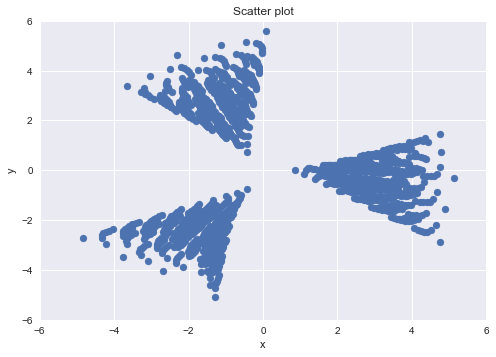

In [155]:
x = []
for i in range(len(curr_popn)):
    x.append(curr_popn[i][0])

y = []
for i in range(len(curr_popn)):
    y.append(curr_popn[i][1])

plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.scatter(x,y)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

---------

In [157]:
r = (np.sqrt(3)/2)*np.array([np.cos(0),np.sin(0)])
p = (np.sqrt(3)/2)*np.array([np.cos(2*math.pi/3),np.sin(2*math.pi/3)])
s = (np.sqrt(3)/2)*np.array([np.cos(4*math.pi/3),np.sin(4*math.pi/3)])

popn_rps = [r,p,s]
print(popn_rps)

[array([0.8660254, 0.       ]), array([-0.4330127,  0.75     ]), array([-0.4330127, -0.75     ])]


In [ ]:
self_popn_rps = Self_play(popn_rps, eta = 0.1, epoch = 1536)

In [ ]:
self_popn_rps[-10:]

In [160]:
self_rps = open('self_rps.pkl','wb')
pickle.dump(self_popn_rps, self_rps)
self_rps.close()

In [223]:
curr_popn = self_popn_rps[:1436]

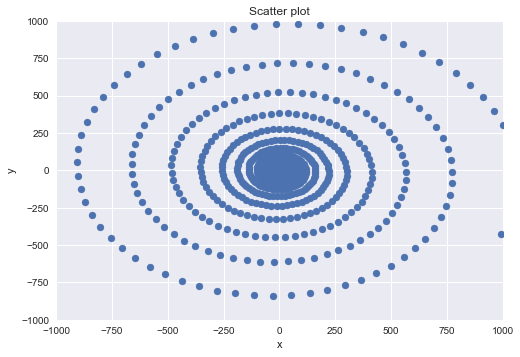

In [224]:
s = []
for i in range(len(curr_popn)):
    s.append(curr_popn[i][0])

t = []
for i in range(len(curr_popn)):
    t.append(curr_popn[i][1])

plt.xlim(-1000, 1000)
plt.ylim(-1000, 1000)
plt.scatter(s,t)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()